# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнил студент гр. 9382 Сорокумов Сергей, вариант 34.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Задaча Коши состоит в нахождении решения дифференциального уравнения, удовлетворяющего так называемым начальным условиям.
<br>Система ОДУ n-го порядка:
\begin{cases}
   y^{(n)} = f(x, y, ..., y^{(n-1)}) \\
   y(x_0) = y_{01} \\
   ... \\
   y^{(n-1)}(x_0) = y_{0n}
 \end{cases}
 
 
Краевая задача — задача о нахождении решения заданного дифференциального уравнения, удовлетворяющего краевым условиям в концах интервала или на границе области.

## Постановка задачи

Дано дифференциальное уравнение:

$$ y''=f(x, y), \ a<x<b \ \  (1)$$ 
и граничные условия
$$y(a) = y_a, \ y(b)=y_b  \ \ (2)$$
Требуется найти решение задачи (1)-(2) и построить его график.
<br>Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$$y(a) = y_a, \ y'(a) = h \ \ (3)$$
План решения основан на многократном решении задачи Коши (1), (3).
<br>Значение решения задачи Коши при x = b является функцией от h.
<br>Задача сводится к отысканию такого значения переменной h, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться
$$y(b,h)=y_b \ \ (4)$$
Это уравнение с одним неизвестным h.
<br>Для его решения можно применить стандартный метод половинного
деления.

## Выполнение работы


$$a=0, \ \ b=2 $$
$$y'' = \sqrt{|2+xy|}$$
$$y(0)=3, \ \ y(2)=4 $$

В терминах задачи коши, данныем будут выглядеть:
$$\begin{cases}
   y'' = \sqrt{|2+xy|} \\ 
   y(0) = 3 \\
   y'(0) = h
 \end{cases}$$

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random

In [93]:
a = 0
y_a = 3
b = 2
y_b = 4
eps = 0.001
x = np.arange(a, b, eps)

In [94]:
def d2(y, x):
    return[y[1], np.sqrt(np.abs(2+ y[0]*x))]

h = 5
y(b, h) = 18.310328323278018


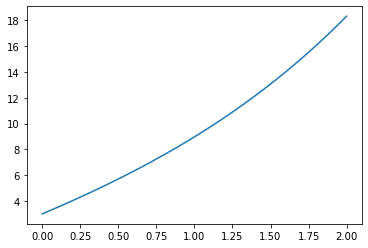

In [109]:
h = 5
res_val = None
res_h = None
abs_val = np.inf

tmp_val = odeint(d2, [y_a, h], x)
if (abs_val > np.abs(tmp_val[-1, 0]-y_b)):
    res_val = tmp_val
    res_h = h
    abs_val = np.abs(tmp_val[-1, 0]-y_b)
        
values = res_val

plt.plot(x, values[:,0])
print(f'h = {h}')
print(f'y(b, h) = {values[-1, 0]}')

Шаг $\Delta{h} = -0.1$ 
<br>Решаем до тех пор пока $y_b > f(b, h_0)$

4
18.310328323278018
5
4.5
4.0
3.5
3.0
2.5
2.0
1.5
1.0
0.5
0.0
-0.5
-1.0
h_m-1=-1.5, f(a, h_m-1) = 3.788510590637787
h_m = -1.0, f(a, h_m) =4.938900733883821


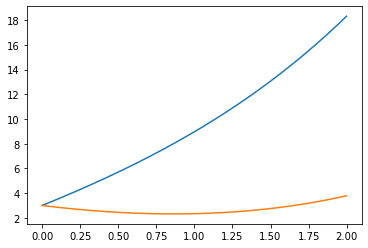

In [133]:
delta = -0.5
tmp_h = h
tmp_y = values[-1, 0]
tmp_val = values
print(y_b)
print(tmp_val[-1, 0])
while y_b < tmp_val[-1, 0]:
    print(tmp_h)
    tmp_h += delta
    tmp_val = odeint(d2, [y_a, tmp_h], x)
plt.plot(x, values[:,0])
plt.plot(x, tmp_val[:,0])
print(f'h_m-1={tmp_h}, f(a, h_m-1) = {tmp_val[-1, 0]}')
print(f'h_m = {tmp_h+0.5}, f(a, h_m) ={odeint(d2, [y_a, tmp_h+0.5], x)[-1, 0]}')

upH = tmp_h+0.5
upY = odeint(d2, [y_a, tmp_h+0.5], x)[-1, 0]
lH = tmp_h
lY = tmp_val[-1, 0]

Методом половинного деления к уравнению (4), остановим процесс, когда выполнится неравенство $|y(b, h_m)-y(b, h_{m-1})|< 0.001$ или количество шагов будет больше 100

Значение h находится в интервале [-1.5, -1.499755859375], значение функции в интервале [3.788510590637787, 3.789074857645796]


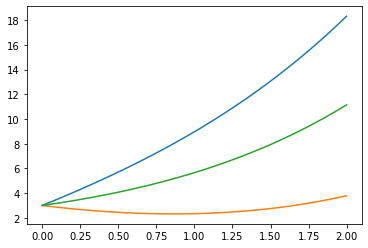

In [134]:
step = 0
while np.abs(upY - lY) >= eps and step < 100:
    step += 1
    mH = (upH+lH)/2
    res_val = odeint(d2, [y_a, (h+mH)/2], x)
    if (res_val[-1, 0] > 4):
        upH = mH
        upY = odeint(d2, [y_a, upH], x)[-1, 0]
    else:
        lH = mH
        lY = odeint(d2, [y_a, lH], x)[-1, 0]
        
print(f'Значение h находится в интервале {[lH, upH]}, значение функции в интервале {[lY, upY]}')
plt.plot(x, values[:,0])
plt.plot(x, tmp_val[:,0])
plt.plot(x, res_val[:,0])

## Выводы

В ходе выполнения работы была решена краевая задача для уравнения II-го порядка путём многократного решения задачи Коши.
<br>Решение задачи - 3.788510590637787